<h1> Daniel Chang: <br>
ECE ENGR 131A Project Winter 2024
</h1>

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm

<h1> Question 1a </h1>

In [3]:
def simulate_die_tosses(tosses):
    outcomes = np.random.randint(1, 13, tosses)
    odd_outcomes = np.sum(outcomes % 2 != 0)
    estimated_probability = odd_outcomes / tosses
    return estimated_probability

toss_counts = [50, 100, 1000, 2000, 3000, 10000, 100000]
estimated_probabilities = {}

for toss in toss_counts:
    estimated_probabilities[toss] = simulate_die_tosses(toss)

estimated_probabilities

{50: 0.4,
 100: 0.6,
 1000: 0.496,
 2000: 0.4925,
 3000: 0.499,
 10000: 0.5096,
 100000: 0.50239}

<h1> Question 1b </h1>

The probability that random variable X, which represents the outcomes of a 12 sided fair die, has an odd value is 0.5.
For a fair 12 sided die, there are 6 outcomes where the toss is an odd value (1,3,5,7,9,11).
To get the probability of rolling an odd number, you would have to divide the number of odd outcomes with the total number of outcomes. 
P(odd) = 6/120 = 0.5

<h1> Question 1c </h1>

Yes, the theoretical results of part b agree with the results of part b. Each simulated die toss had an estimated probability of about 0.5 which is consistent with the probability of random variable X having an odd value being 0.5 as well.

<h1> Question 1d </h1>

In [4]:
sides = np.arange(1, 13)

likelihoods = {}

prime_numbers = [2, 3, 5, 7, 11]

for side in sides:
    if side in prime_numbers:
        likelihoods[side] = 2
    else:
        likelihoods[side] = 1

total_likelihood = sum(likelihoods.values())

odd_likelihood = 0
for side, likelihood in likelihoods.items():
    if side % 2 != 0:
        odd_likelihood += likelihood

theoretical_probability_odd = odd_likelihood / total_likelihood

def simulate_biased_die_tosses(tosses, likelihoods):
    sides = list(likelihoods.keys())

    probabilities = []

    for side in sides:
        probabilities.append(likelihoods[side] / total_likelihood)
    
    outcomes = np.random.choice(sides, size=tosses, p=probabilities)
    
    odd_outcomes = np.sum(outcomes % 2 != 0)
    
    estimated_probability = odd_outcomes / tosses
    return estimated_probability

toss_counts = [50, 100, 1000, 2000, 3000, 10000, 100000]

biased_estimated_probabilities = {}

for tosses in toss_counts:
    biased_estimated_probabilities[tosses] = simulate_biased_die_tosses(tosses, likelihoods)
print("Part A: ")
print("Biased Estimated Probabilities: " + str(biased_estimated_probabilities))
print("Part B: ")
print("Probability of Random Variable X with Biased Properties: " + str(theoretical_probability_odd))
print("Part C:")
print("The simulated probabilities for the biased dice are quite close to the theoretical probability of rolling an odd number for the biased coin. As the number of coin tosses increase, the estimated probabilities converge to the theoretical probability, which showcases the Law of Large Numbers.")

Part A: 
Biased Estimated Probabilities: {50: 0.6, 100: 0.56, 1000: 0.593, 2000: 0.5815, 3000: 0.5883333333333334, 10000: 0.5947, 100000: 0.58526}
Part B: 
Probability of Random Variable X with Biased Properties: 0.5882352941176471
Part C:
The simulated probabilities for the biased dice are quite close to the theoretical probability of rolling an odd number for the biased coin. As the number of coin tosses increase, the estimated probabilities converge to the theoretical probability, which showcases the Law of Large Numbers.


<h1> Question 2b </h1>

In [48]:
file_path = 'data.txt'
df = pd.read_csv(file_path, header=None)

# Calculating mu_MLE value
x = df.sum()
mu_MLE = x / 100000
mu_MLE_value = mu_MLE.iloc[0]

print("mu_MLE =  " + str(mu_MLE_value))

# Correcting the calculation for sigma_MLE value
y = 0
n = len(df)  # Assuming you want to loop over all rows in your DataFrame
for i in range(n):
    y += (df.iloc[i, 0] - mu_MLE_value) ** 2
sigma_MLE_value = (y / n) ** 0.5

print("sigma_MLE =  " + str(sigma_MLE_value))


mu_MLE =  71.94377524297302
sigma_MLE =  13.054700550047032


<h1> Question 2c </h1>

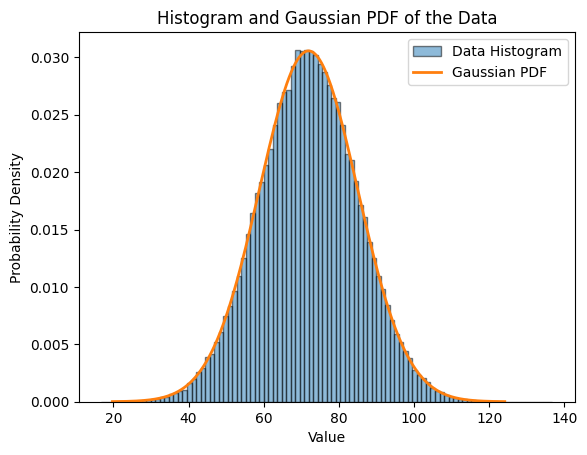

In [51]:
# Calculate the mean (mu_MLE) and standard deviation (sigma_MLE) of the dataset
mu_MLE = df[0].mean()
sigma_MLE = df[0].std()

# Generate the values for the Gaussian PDF
x_values = np.linspace(mu_MLE - 4*sigma_MLE, mu_MLE + 4*sigma_MLE, 1000)
pdf_values = norm.pdf(x_values, mu_MLE, sigma_MLE)

# Plotting the histogram of the data
plt.hist(df[0], bins=100, density=True, alpha=0.5, label='Data Histogram',  edgecolor='black')

# Plotting the Gaussian PDF on top of the histogram
plt.plot(x_values, pdf_values, label='Gaussian PDF', linewidth=2)

# Adding title and labels
plt.title('Histogram and Gaussian PDF of the Data')
plt.xlabel('Value')
plt.ylabel('Probability Density')

# Adding a legend
plt.legend()

# Show the plot
plt.show()


<h1> Question 3a </h1>

P(Buy) = 0.3855693348365276
P(Not Buy) = 0.6144306651634723
P(Buy) + P(Not_Buy) = 1.0


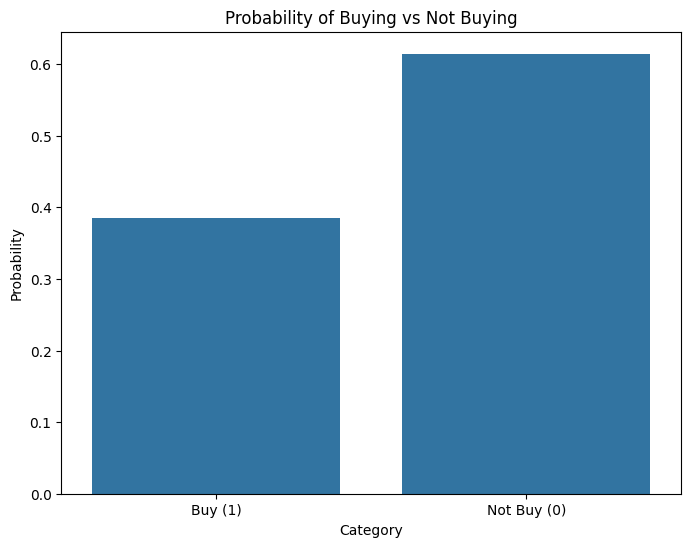

P(Spender Type 1) = 0.33032694475760993
P(Spender Type 2) = 0.3201803833145434
P(Spender Type 3) = 0.34949267192784667
P(Buy) + P(Not_Buy) = 1.0


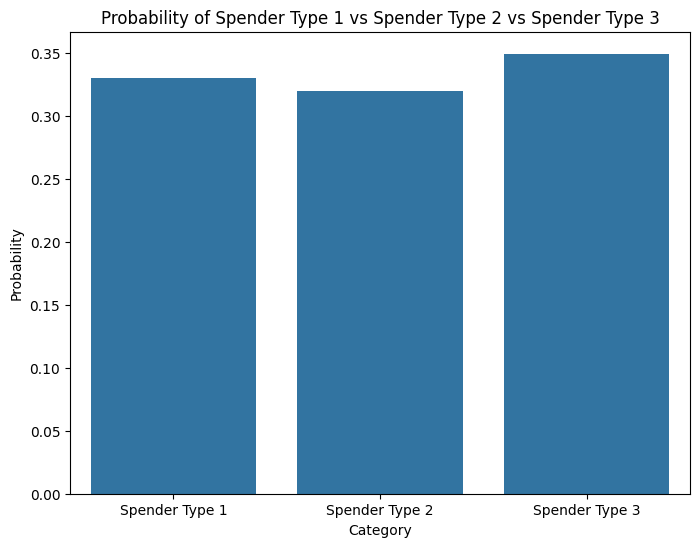

P(Male) = 0.35400225479143177
P(Female) = 0.6459977452085682
P(Male) + P(Female) = 1.0


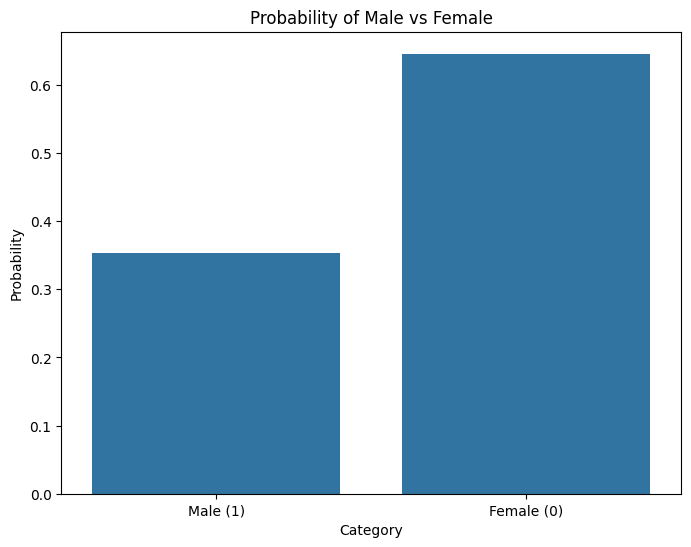

P(56) = 0.006764374295377677
P(61) = 0.019165727170236752
P(83) = 0.011273957158962795
P(50) = 0.009019165727170236
P(40) = 0.016910935738444193
P(81) = 0.011273957158962795
P(16) = 0.006764374295377677
P(84) = 0.013528748590755355
P(22) = 0.007891770011273957
P(52) = 0.011273957158962795
P(70) = 0.015783540022547914
P(28) = 0.013528748590755355
P(76) = 0.009019165727170236
P(90) = 0.011273957158962795
P(43) = 0.014656144306651634
P(26) = 0.015783540022547914
P(80) = 0.020293122886133032
P(91) = 0.010146561443066516
P(75) = 0.012401352874859075
P(94) = 0.014656144306651634
P(34) = 0.016910935738444193
P(78) = 0.012401352874859075
P(62) = 0.012401352874859075
P(45) = 0.013528748590755355
P(44) = 0.013528748590755355
P(86) = 0.012401352874859075
P(74) = 0.011273957158962795
P(82) = 0.016910935738444193
P(73) = 0.014656144306651634
P(66) = 0.013528748590755355
P(95) = 0.007891770011273957
P(41) = 0.015783540022547914
P(36) = 0.016910935738444193
P(33) = 0.010146561443066516
P(72) = 0.0124

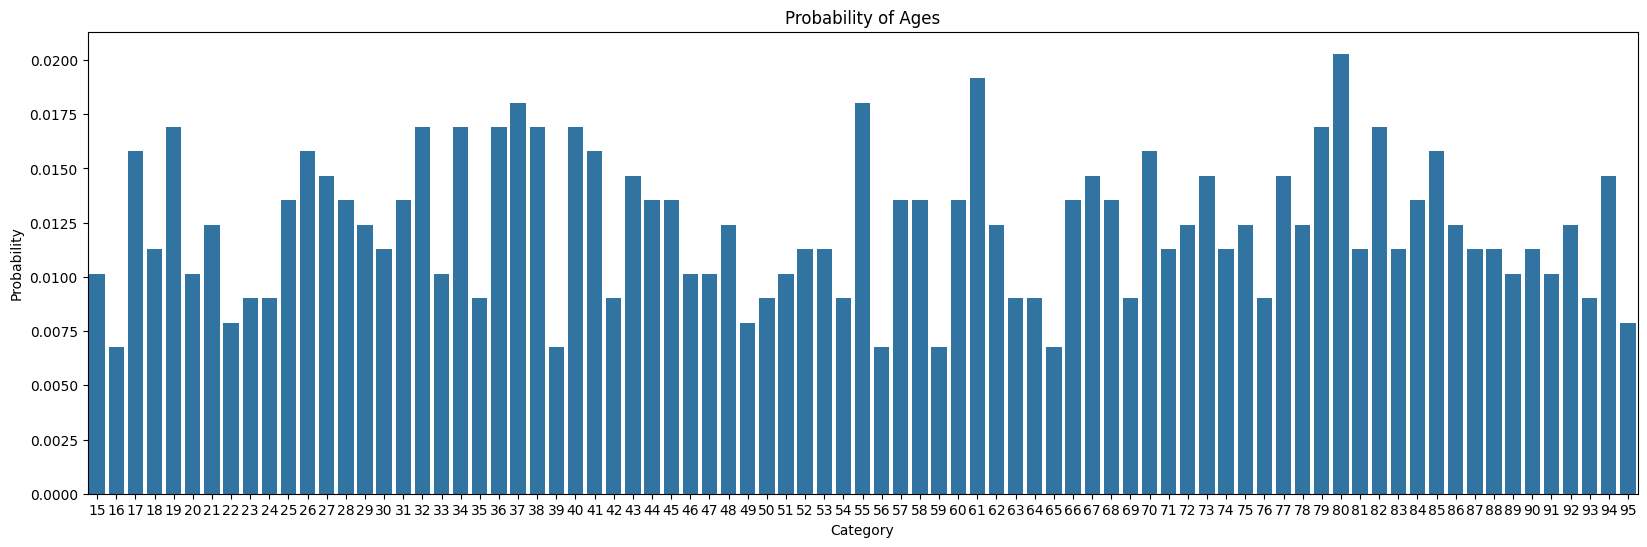

In [6]:
file_path = 'user_data.csv'
df = pd.read_csv(file_path)

total = 887

B = df['Bought']

T = df['Spender Type']

S = df["Sex"]

A = df["Age"]

# Bought: 0 vs. 1

buy = 0
not_buy = 0
for num in B:
    if num == 1:
        buy +=1 
    else:
        not_buy +=1 

prob_buy = buy / total
prob_not_buy = not_buy / total

print("P(Buy) = " + str(prob_buy))
print("P(Not Buy) = " + str(prob_not_buy))
print("P(Buy) + P(Not_Buy) = " + str(prob_buy + prob_not_buy))

bought_data = {'Category': ['Buy (1)', 'Not Buy (0)'],
            'Probability': [prob_buy, prob_not_buy]}

df_plot_bought_data = pd.DataFrame(bought_data)

plt.figure(figsize=(8, 6))
sns.barplot(x = 'Category', y = 'Probability', data = df_plot_bought_data)
plt.title('Probability of Buying vs Not Buying')
plt.show()

# Spender Type: 1 vs. 2 vs. 3
one = 0
two = 0
three = 0

for num in T:
    if num == 1:
        one += 1
    elif num == 2:
        two += 1
    else:
        three += 1

prob_large_spender = one / total
prob_medium_spender = two / total
prob_small_spender = three / total

print("P(Spender Type 1) = " + str(prob_large_spender))
print("P(Spender Type 2) = " + str(prob_medium_spender))
print("P(Spender Type 3) = " + str(prob_small_spender))
print("P(Buy) + P(Not_Buy) = " + str(prob_large_spender + prob_medium_spender + prob_small_spender))

spender_type_data = {'Category' : ['Spender Type 1', 'Spender Type 2', 'Spender Type 3'],
                     'Probability' : [prob_large_spender, prob_medium_spender, prob_small_spender]}

df_plot_spender_type_data = pd.DataFrame(spender_type_data)

plt.figure(figsize=(8,6))
sns.barplot(x = 'Category', y = 'Probability', data = df_plot_spender_type_data)
plt.title("Probability of Spender Type 1 vs Spender Type 2 vs Spender Type 3")
plt.show()

male = 0
female = 0
for num in S:
    if num == 1:
        male += 1
    else: 
        female += 1

prob_male = male / total
prob_female = female / total

print("P(Male) = " + str(prob_male))
print("P(Female) = " + str(prob_female))
print("P(Male) + P(Female) = " + str(prob_male + prob_female))

gender_type_data = {'Category' : ['Male (1)', 'Female (0)'], 
                    'Probability': [prob_male, prob_female]}

df_plot_gender_type_data = pd.DataFrame(gender_type_data)

plt.figure(figsize=(8,6))
sns.barplot(x = 'Category', y = 'Probability', data = df_plot_gender_type_data)
plt.title("Probability of Male vs Female")
plt.show()

dict_age = dict()

for age in A:
    if age not in dict_age:
        dict_age[age] = 1
    else:
        dict_age[age] += 1

observed_age_probabilities = {}        
for age, count in dict_age.items():
    observed_age_probabilities[age] = count / total
    
for age, prob in observed_age_probabilities.items():
    print("P(" + str(age) + ") = " + str(prob))

sum_prob_age = 0
for prob in observed_age_probabilities.values():
    sum_prob_age += prob
print("Sum of Age Probabilities = " + str(sum_prob_age))

age_type_data = {'Category' : observed_age_probabilities.keys(), 
                'Probability' : observed_age_probabilities.values()}

df_plot_age_type_data = pd.DataFrame(age_type_data)

plt.figure(figsize=(20,6))
sns.barplot(x = 'Category', y = 'Probability', data = df_plot_age_type_data)
plt.title("Probability of Ages")
plt.show()


<h1> Question 3b </h1>

P(Small | Buy) = 0.34210526315789475
P(Medium | Buy) = 0.3157894736842105
P(Large | Buy) = 0.34210526315789475
P(Small | Buy) + P(Medium | Buy) + P(Large | Buy) = 1.0


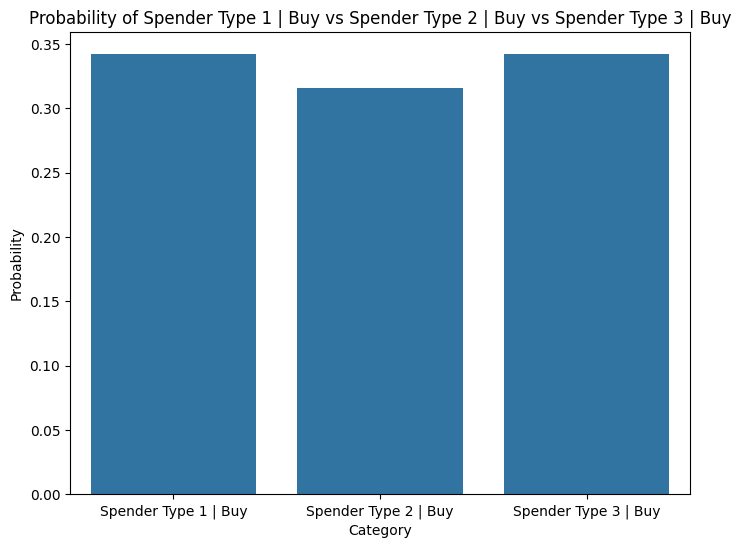

P(Small | Not Buy) = 0.3541284403669725
P(Medium | Not Buy) = 0.3229357798165138
P(Large | Not Buy) = 0.3229357798165138
P(Small | Not Buy) + P(Medium | Not Buy) + P(Large | Not Buy) = 1.0


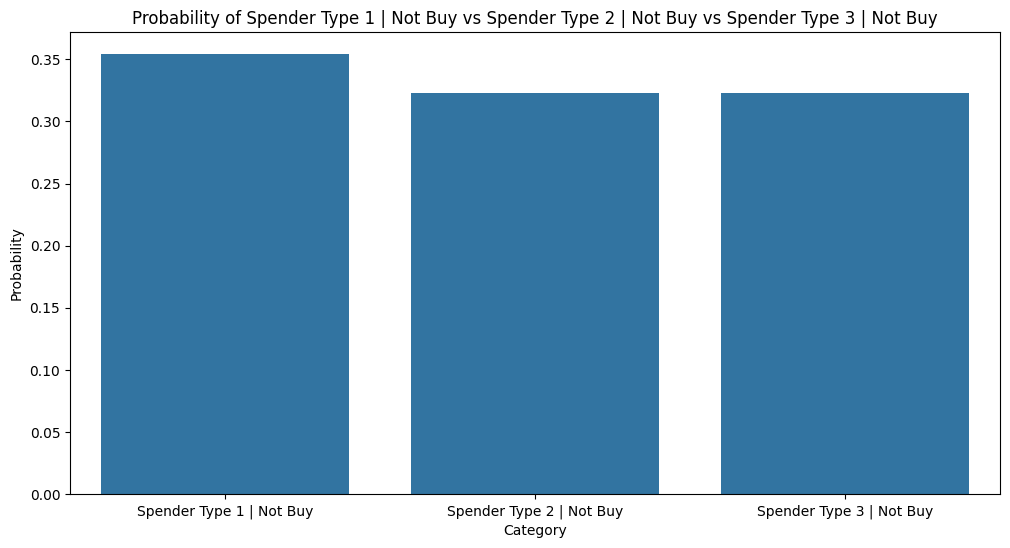

P(Male | Buy) = 0.6754385964912281
P(Female | Buy) = 0.32456140350877194
P(Male | Buy) + P(Female | Buy) = 1.0


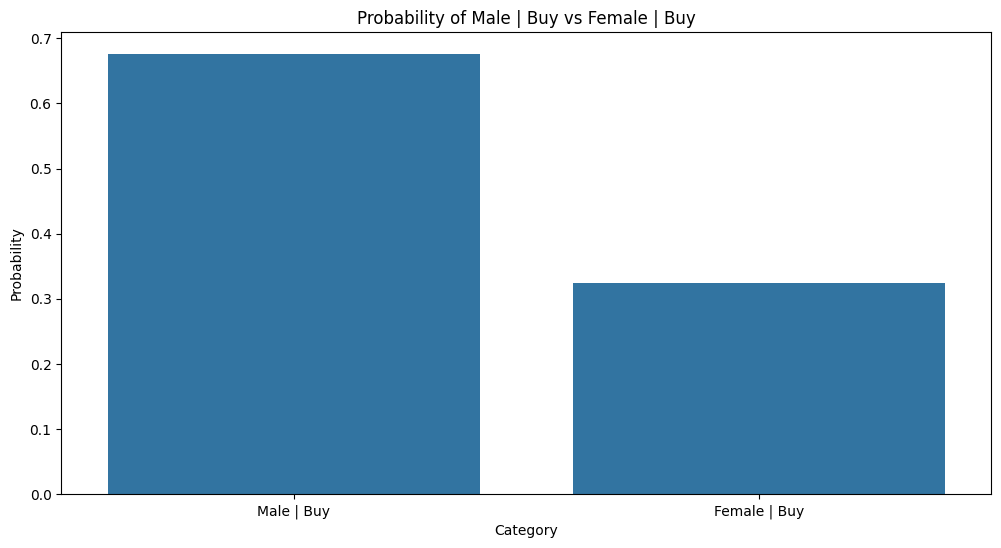

P(Male | No Buy) = 0.15229357798165138
P(Female | No Buy) = 0.8477064220183487
P(Male | No Buy) + P(Female | No Buy) = 1.0


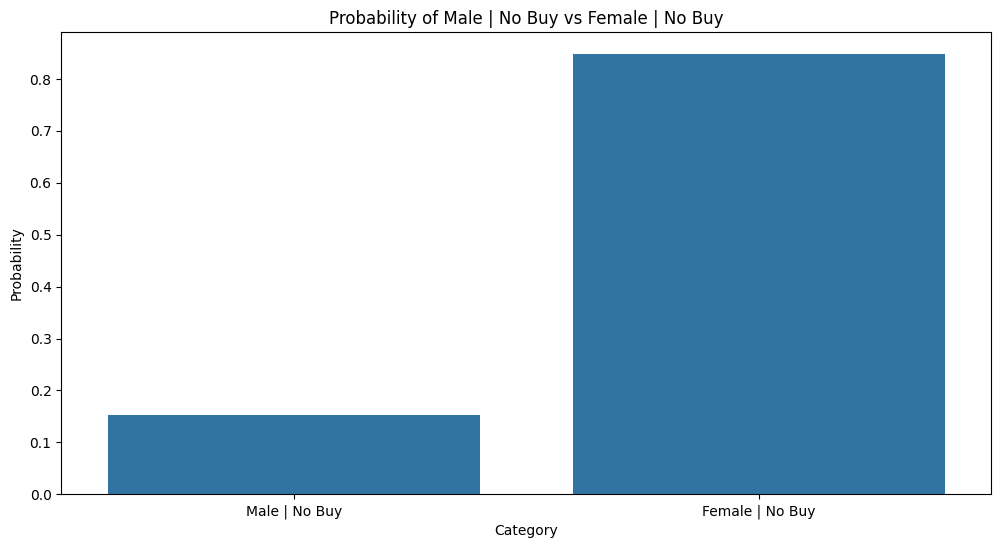

P(61 | Buy) = 0.014619883040935672
P(40 | Buy) = 0.017543859649122806
P(16 | Buy) = 0.011695906432748537
P(84 | Buy) = 0.011695906432748537
P(22 | Buy) = 0.008771929824561403
P(90 | Buy) = 0.011695906432748537
P(43 | Buy) = 0.02046783625730994
P(80 | Buy) = 0.02631578947368421
P(91 | Buy) = 0.014619883040935672
P(94 | Buy) = 0.017543859649122806
P(62 | Buy) = 0.017543859649122806
P(45 | Buy) = 0.011695906432748537
P(52 | Buy) = 0.005847953216374269
P(44 | Buy) = 0.017543859649122806
P(86 | Buy) = 0.014619883040935672
P(95 | Buy) = 0.008771929824561403
P(41 | Buy) = 0.023391812865497075
P(33 | Buy) = 0.008771929824561403
P(79 | Buy) = 0.011695906432748537
P(27 | Buy) = 0.017543859649122806
P(63 | Buy) = 0.005847953216374269
P(78 | Buy) = 0.011695906432748537
P(57 | Buy) = 0.017543859649122806
P(36 | Buy) = 0.017543859649122806
P(47 | Buy) = 0.011695906432748537
P(17 | Buy) = 0.017543859649122806
P(71 | Buy) = 0.011695906432748537
P(67 | Buy) = 0.011695906432748537
P(88 | Buy) = 0.020467

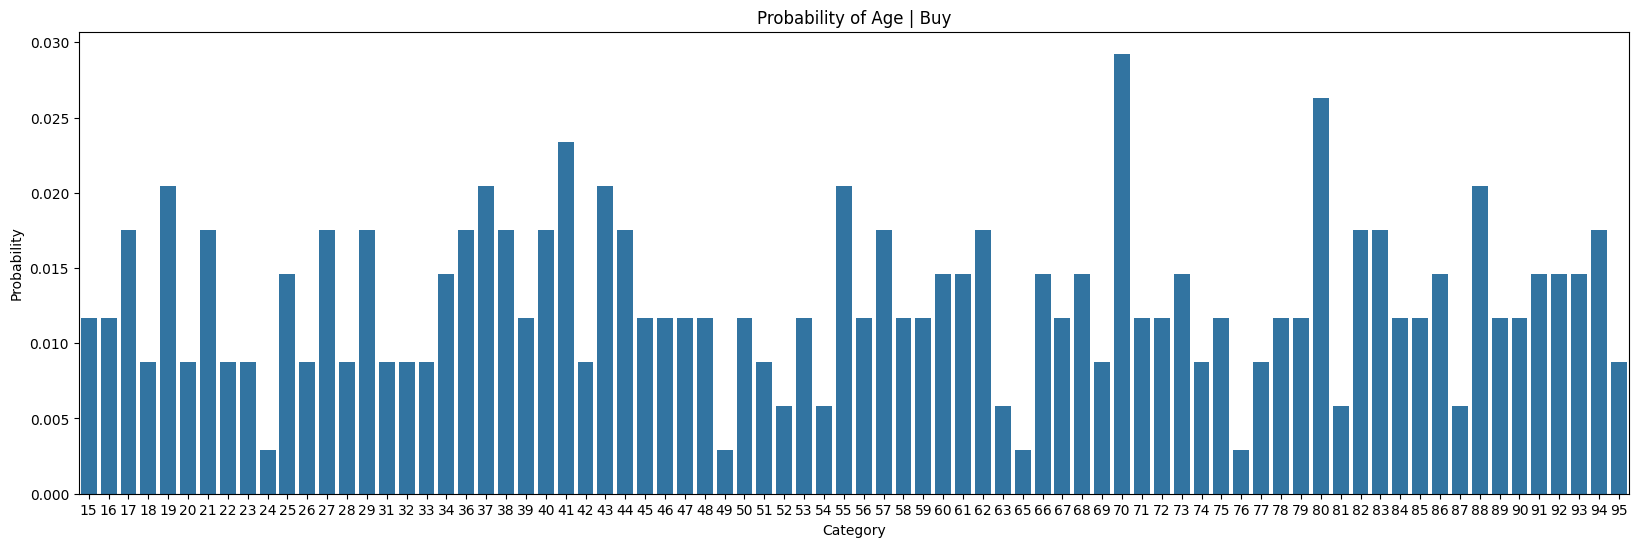

P(56 | No Buy) = 0.003669724770642202
P(83 | No Buy) = 0.007339449541284404
P(50 | No Buy) = 0.007339449541284404
P(61 | No Buy) = 0.022018348623853212
P(81 | No Buy) = 0.014678899082568808
P(52 | No Buy) = 0.014678899082568808
P(70 | No Buy) = 0.007339449541284404
P(28 | No Buy) = 0.01651376146788991
P(76 | No Buy) = 0.012844036697247707
P(26 | No Buy) = 0.02018348623853211
P(75 | No Buy) = 0.012844036697247707
P(34 | No Buy) = 0.01834862385321101
P(78 | No Buy) = 0.012844036697247707
P(74 | No Buy) = 0.012844036697247707
P(82 | No Buy) = 0.01651376146788991
P(73 | No Buy) = 0.014678899082568808
P(66 | No Buy) = 0.012844036697247707
P(84 | No Buy) = 0.014678899082568808
P(36 | No Buy) = 0.01651376146788991
P(72 | No Buy) = 0.012844036697247707
P(77 | No Buy) = 0.01834862385321101
P(44 | No Buy) = 0.011009174311926606
P(38 | No Buy) = 0.01651376146788991
P(59 | No Buy) = 0.003669724770642202
P(27 | No Buy) = 0.012844036697247707
P(47 | No Buy) = 0.009174311926605505
P(68 | No Buy) = 0.

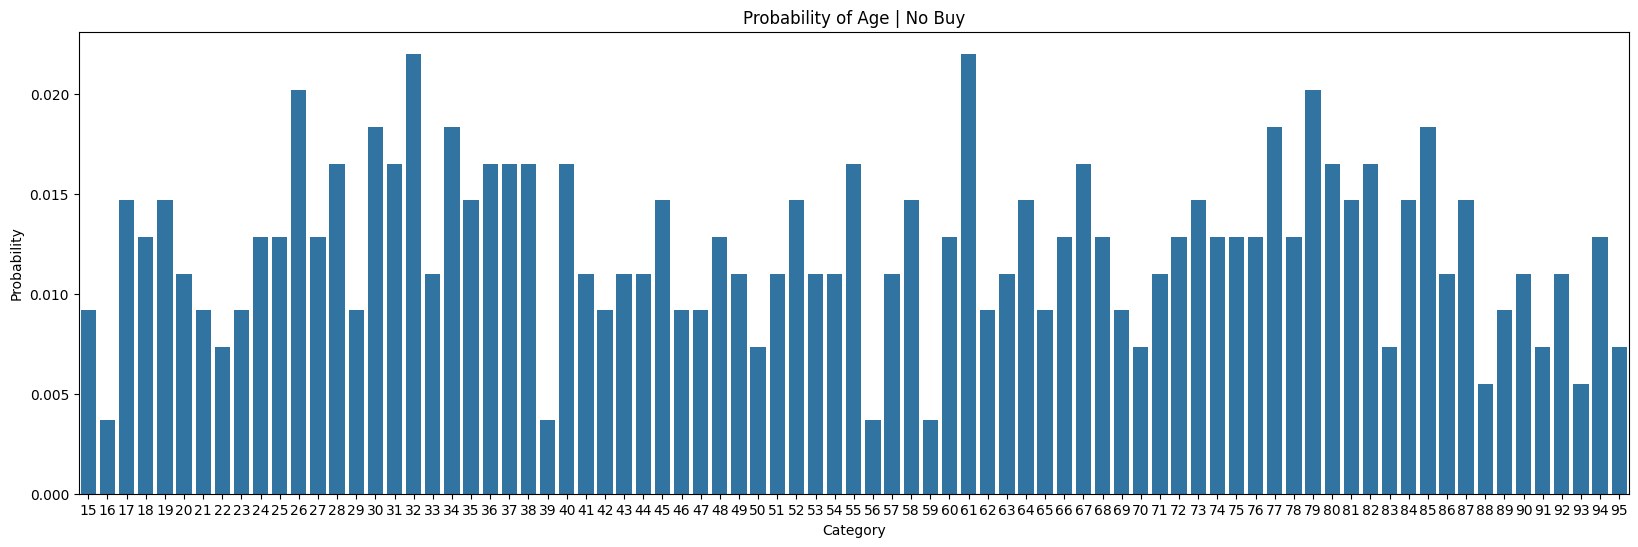

In [7]:
file_path = 'user_data.csv'
df = pd.read_csv(file_path)

total = 887

B = df['Bought']

T = df['Spender Type']

S = df["Sex"]

A = df["Age"]

B = np.array(B)
T = np.array(T)

# Condition that the spender type buys
# P(Spender Type | Buy)

total_buy = np.sum(B == 1)

small_spender_buyer_type = 0
medium_spender_buyer_type = 0
large_spender_buyer_type = 0

for i in range(len(B)):
    if B[i] == 1:
        if T[i] == 1:
            large_spender_buyer_type += 1
        elif T[i] == 2:
            medium_spender_buyer_type += 1
        else:
            small_spender_buyer_type += 1
prob_small_spender_buyer_type = small_spender_buyer_type / total_buy
prob_medium_spender_buyer_type = medium_spender_buyer_type / total_buy
prob_large_spender_buyer_type = large_spender_buyer_type / total_buy

print("P(Small | Buy) = " + str(prob_small_spender_buyer_type))
print("P(Medium | Buy) = " + str(prob_medium_spender_buyer_type))
print("P(Large | Buy) = " + str(prob_large_spender_buyer_type))

print("P(Small | Buy) + P(Medium | Buy) + P(Large | Buy) = " + str(prob_small_spender_buyer_type + prob_medium_spender_buyer_type + prob_large_spender_buyer_type))

spender_type_data_buy = {'Category' : ['Spender Type 1 | Buy', 'Spender Type 2 | Buy', 'Spender Type 3 | Buy'],
                     'Probability' : [prob_small_spender_buyer_type, prob_medium_spender_buyer_type, prob_large_spender_buyer_type]}

df_plot_spender_type_data_buy_data = pd.DataFrame(spender_type_data_buy)

plt.figure(figsize=(8,6))
sns.barplot(x = 'Category', y = 'Probability', data = df_plot_spender_type_data_buy_data)
plt.title("Probability of Spender Type 1 | Buy vs Spender Type 2 | Buy vs Spender Type 3 | Buy")
plt.show()

# Condition that the spender type does not buy
# P(Spender Type | Not Buy)

total_not_buy = np.sum(B == 0)


small_spender_not_buyer_type = 0
medium_spender_not_buyer_type = 0
large_spender_not_buyer_type = 0

for i in range(len(B)):
    if B[i] == 0:
        if T[i] == 1:
            large_spender_not_buyer_type += 1
        elif T[i] == 2:
            medium_spender_not_buyer_type += 1
        else:
            small_spender_not_buyer_type += 1

prob_small_spender_not_buyer_type = small_spender_not_buyer_type / total_not_buy
prob_medium_spender_not_buyer_type = medium_spender_not_buyer_type / total_not_buy
prob_large_spender_not_buyer_type = large_spender_not_buyer_type / total_not_buy

print("P(Small | Not Buy) = " + str(prob_small_spender_not_buyer_type))
print("P(Medium | Not Buy) = " + str(prob_medium_spender_not_buyer_type))
print("P(Large | Not Buy) = " + str(prob_large_spender_not_buyer_type))

print("P(Small | Not Buy) + P(Medium | Not Buy) + P(Large | Not Buy) = " + str(prob_small_spender_not_buyer_type + prob_medium_spender_not_buyer_type + prob_large_spender_not_buyer_type))

spender_type_data_not_buy = {'Category' : ['Spender Type 1 | Not Buy', 'Spender Type 2 | Not Buy', 'Spender Type 3 | Not Buy'],
                     'Probability' : [prob_small_spender_not_buyer_type, prob_medium_spender_not_buyer_type, prob_large_spender_not_buyer_type]}

df_plot_spender_type_data_not_buy_data = pd.DataFrame(spender_type_data_not_buy)

plt.figure(figsize=(12,6))
sns.barplot(x = 'Category', y = 'Probability', data = df_plot_spender_type_data_not_buy_data)
plt.title("Probability of Spender Type 1 | Not Buy vs Spender Type 2 | Not Buy vs Spender Type 3 | Not Buy")
plt.show()

# Condition that Gender Type Buys
# P(Gender Type | Buys)

male_buyer_type = 0
female_buyer_type = 0

for i in range(len(B)):
    if B[i] == 1:
        if S[i] == 1:
            male_buyer_type += 1
        else:
            female_buyer_type += 1

prob_male_buyer_type = male_buyer_type / total_buy
prob_female_buyer_type = female_buyer_type / total_buy

print("P(Male | Buy) = " + str(prob_male_buyer_type))
print("P(Female | Buy) = " + str(prob_female_buyer_type))

print("P(Male | Buy) + P(Female | Buy) = " + str(prob_male_buyer_type + prob_female_buyer_type))

gender_type_data_buy = {'Category' : ['Male | Buy', 'Female | Buy'],
                     'Probability' : [prob_male_buyer_type, prob_female_buyer_type]}

df_plot_gender_type_data_buy_data = pd.DataFrame(gender_type_data_buy)

plt.figure(figsize=(12,6))
sns.barplot(x = 'Category', y = 'Probability', data = df_plot_gender_type_data_buy_data)
plt.title("Probability of Male | Buy vs Female | Buy")
plt.show()

# Condition that Gender type does not buy
# P(Gender Type | Buys)

male_not_buyer_type = 0
female_not_buyer_type = 0

for i in range(len(B)):
    if B[i] == 0:
        if S[i] == 1:
            male_not_buyer_type += 1
        else:
            female_not_buyer_type += 1

prob_male_not_buyer_type = male_not_buyer_type / total_not_buy
prob_female_not_buyer_type = female_not_buyer_type / total_not_buy

print("P(Male | No Buy) = " + str(prob_male_not_buyer_type))
print("P(Female | No Buy) = " + str(prob_female_not_buyer_type))

print("P(Male | No Buy) + P(Female | No Buy) = " + str(prob_male_not_buyer_type + prob_female_not_buyer_type))

gender_type_data_no_buy = {'Category' : ['Male | No Buy', 'Female | No Buy'],
                     'Probability' : [prob_male_not_buyer_type, prob_female_not_buyer_type]}

df_plot_gender_type_data_no_buy_data = pd.DataFrame(gender_type_data_no_buy)

plt.figure(figsize=(12,6))
sns.barplot(x = 'Category', y = 'Probability', data = df_plot_gender_type_data_no_buy_data)
plt.title("Probability of Male | No Buy vs Female | No Buy")
plt.show()

# Condition that Age does buy
# P(Age | Buy)

age_buy_dict = {}

for i in range(len(B)):
    if B[i] == 1:
        if A[i] not in age_buy_dict:
            age_buy_dict[A[i]] = 1
        else:
            age_buy_dict[A[i]] += 1

prob_age_buy_dict = {}

for age, count in age_buy_dict.items():
        prob_age_buy_dict[age] = count / total_buy

for age, prob in prob_age_buy_dict.items():
    print("P(" + str(age) + " | Buy) = " + str(prob)) 

print("Sum of Age Probabilties | Buy = " + str(sum(prob_age_buy_dict.values())))

age_type_data_buy = {'Category' : prob_age_buy_dict.keys(),
                     'Probability' : prob_age_buy_dict.values()}

df_plot_age_type_buy_data = pd.DataFrame(age_type_data_buy)

print(df_plot_age_type_buy_data)

plt.figure(figsize=(20,6))
sns.barplot(x = 'Category', y = 'Probability', data = df_plot_age_type_buy_data)
plt.title("Probability of Age | Buy")
plt.show()

# Condition that Age does not buy
# P(Age | No Buy)

age_no_buy_dict = {}

for i in range(len(B)):
    if B[i] == 0:
        if A[i] not in age_no_buy_dict:
            age_no_buy_dict[A[i]] = 1
        else:
            age_no_buy_dict[A[i]] += 1

prob_age_no_buy_dict = {}

for age, count in age_no_buy_dict.items():
        prob_age_no_buy_dict[age] = count / total_not_buy

for age, prob in prob_age_no_buy_dict.items():
    print("P(" + str(age) + " | No Buy) = " + str(prob)) 

print("Sum of Age Probabilties | No Buy = " + str(sum(prob_age_no_buy_dict.values())))

age_type_data_no_buy = {'Category' : prob_age_no_buy_dict.keys(),
                     'Probability' : prob_age_no_buy_dict.values()}

df_plot_age_type_no_buy_data = pd.DataFrame(age_type_data_no_buy)

print(df_plot_age_type_no_buy_data)

plt.figure(figsize=(20,6))
sns.barplot(x = 'Category', y = 'Probability', data = df_plot_age_type_no_buy_data)
plt.title("Probability of Age | No Buy")
plt.show()



<h1> Question 3c </h1>

In [8]:
# P(B,T,S,A) = P(T, S, A | B) * P(B)
# P(B,T,S,A) = P(T | B) * P(S | B) * P(A | B) * P(B)

# compute P(B = 0, T = 1, S = 0, A <= 67)

# P(T = 1 | B = 0) * P(S = 0 | B = 0) * P( A <= 67 | B = 0) * P(B = 0)

prob_age_67_or_less_no_buy = 0
for age, prob in prob_age_no_buy_dict.items():
    if age <= 67:
        prob_age_67_or_less_no_buy += prob

prob_age_67_or_less_buy = 0
for age, prob in prob_age_buy_dict.items():
    if age <= 67:
        prob_age_67_or_less_buy += prob



# P(Large | Not Buy) = 0.3229357798165138 * P(Female | No Buy) = 0.8477064220183487 * P(Age <= 67 | No Buy) = prob_age_67_or_less_no_buy * P(Not Buy ) = 0.6144306651634723
y = prob_large_spender_not_buyer_type * prob_female_not_buyer_type * prob_age_67_or_less_no_buy * prob_not_buy
print("P(B = 0, T = 1, S = 0, A <= 67) = " + str(y))

# compute P(B = 1, T = 1, S = 0, A <= 67)
# P(T = 1 | B = 1) * P(S = 0 | B = 1) * P(A <= 67 | B = 1) * P(B = 1)
# P(Large | Buy) = 0.34210526315789475 * P(Female | Buy) = 0.32456140350877194 * P(Age <= 67 | Buy) = prob_age_67_or_less_no_buy * P(Buy) = 0.3855693348365276
z =  prob_large_spender_buyer_type * prob_female_buyer_type * prob_age_67_or_less_no_buy * prob_buy
print("P(B = 1, T = 1, S = 0, A <= 67) = " + str(z))






P(B = 0, T = 1, S = 0, A <= 67) = 0.11079813942225072
P(B = 1, T = 1, S = 0, A <= 67) = 0.02820051639187643


<h1> Question 3d </h1>

In [9]:
# Computing P(Age <= 67)

count = 0 
for num in A:
    if num <= 67:
        count += 1
prob_age_67_or_less = count / total

# compute P(B = 0 | T = 1, S = 0, A ≤ 67) 

# P(B = 0 | T = 1, S = 0, A ≤ 67) = P(B = 0, T = 1, S = 0, A <= 67) / P(T = 1, S = 0, A <= 67)

# note that P(T = 1, S = 0, A <= 67) = P(B = 0 | T = 1, S = 0, A ≤ 67) + P(B = 1 | T = 1, S = 0, A ≤ 67) due to Naives Bayes

# y = probability of not buying given the conditions
# z = probability of buying given the conditions

# w = P(B = 0 | T = 1, S = 0, A ≤ 67) 
w = y / (y + z)

print("P(B = 0 | T = 1, S = 0, A ≤ 67) = " + str(w))

# compute P(B = 1 | T = 1, S = 0, A ≤ 67) 

# P(B = 1 | T = 1, S = 0, A ≤ 67) = P(B = 1, T = 1, S = 0, A <= 67) / P(T = 1, S = 0, A <= 67)

# note that P(T = 1, S = 0, A <= 67) = P(B = 0 | T = 1, S = 0, A ≤ 67) + P(B = 1 | T = 1, S = 0, A ≤ 67) due to Naives Bayes

# x = P(B = 1 | T = 1, S = 0, A <= 67)
x = z / (z + y)

print("P(B = 1 | T = 1, S = 0, A ≤ 67) = " + str(x) )

P(B = 0 | T = 1, S = 0, A ≤ 67) = 0.7971166251450162
P(B = 1 | T = 1, S = 0, A ≤ 67) = 0.20288337485498378


Since the probability of not buying given all the conditions is about 80% and the probability of buying given all the conditions is about 20%, we would predict that a female whose age is below 67 and is a large spender will not buy this product.

<h1> Question 4a </h1>

<Figure size 1200x600 with 0 Axes>

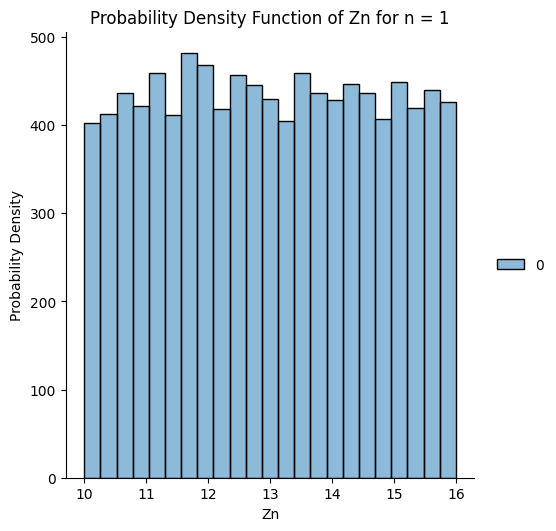

<Figure size 1200x600 with 0 Axes>

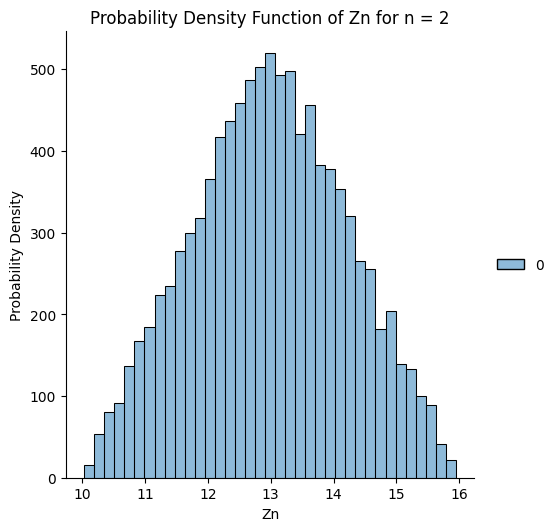

<Figure size 1200x600 with 0 Axes>

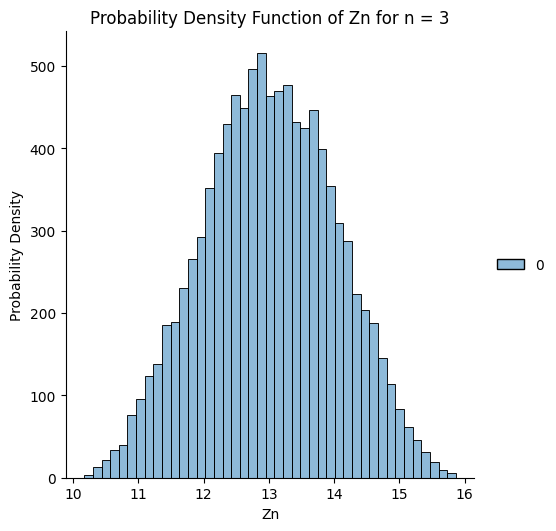

<Figure size 1200x600 with 0 Axes>

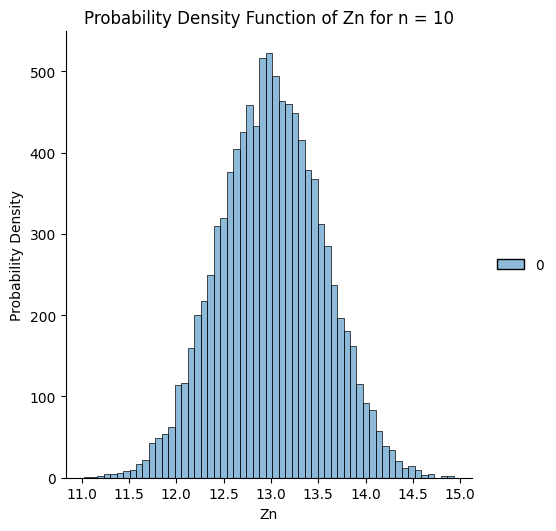

<Figure size 1200x600 with 0 Axes>

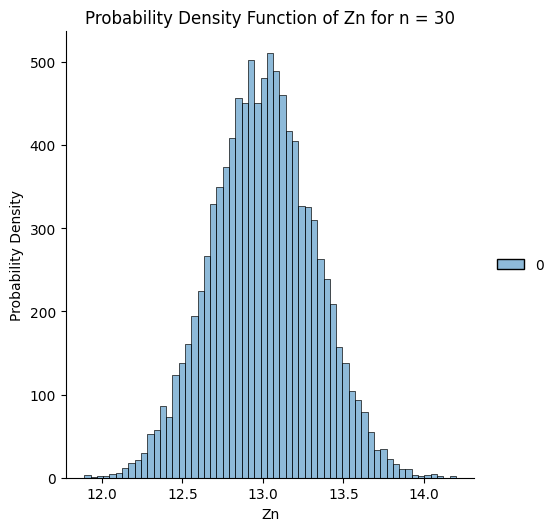

<Figure size 1200x600 with 0 Axes>

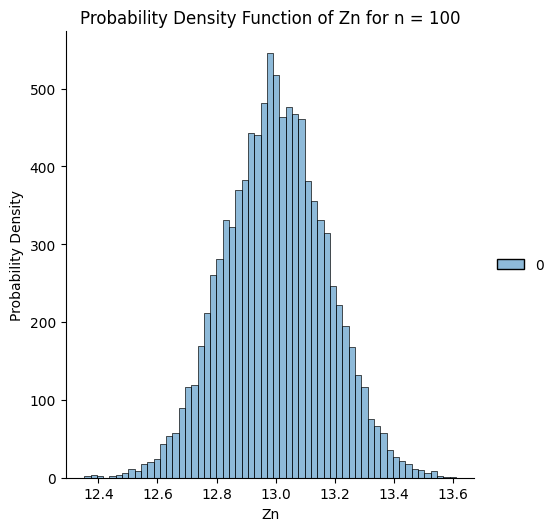

In [10]:
t = 10**4
n_values = [1,2,3,10,30,100]

for n in n_values:
    Zn_samples = np.mean(np.random.uniform(10, 16, (t, n)), axis = 1)
    Zn_samples = pd.DataFrame(Zn_samples)

    plt.figure(figsize=(12,6))
    sns.displot(data = Zn_samples)
    plt.title(f'Probability Density Function of Zn for n = {n}')
    plt.xlabel('Zn')
    plt.ylabel('Probability Density')
    plt.show()

As n increases, the distributions in this histograms resemble a Gaussian Random Variable more. In other words, there is a positive/direct correlation with n and resemblance of a Gaussian Random Variable

<h1> Question 4b </h1>

Note Uniform Continuous Random Variable:
<br>
<br>
Mean for Xi = (10 + 16) / 2 = 26 / 2 = 13
<br>
<br>
Variance for Xi = (16 - 10)^2 / 12 = 36 / 12 = 3
<br>
<br>
Mean of Zn = (E[X1] + E[X2] + E[X3] + ...) / n = 13 * n / n = 13
<br>
<br>
Variance of Zn = (Var(X1) + Var(X2) + Var(X3) + ...) / n^2 = 3 * n / n^2 = 3/n
<br>

<h1> Question 4c </h1>

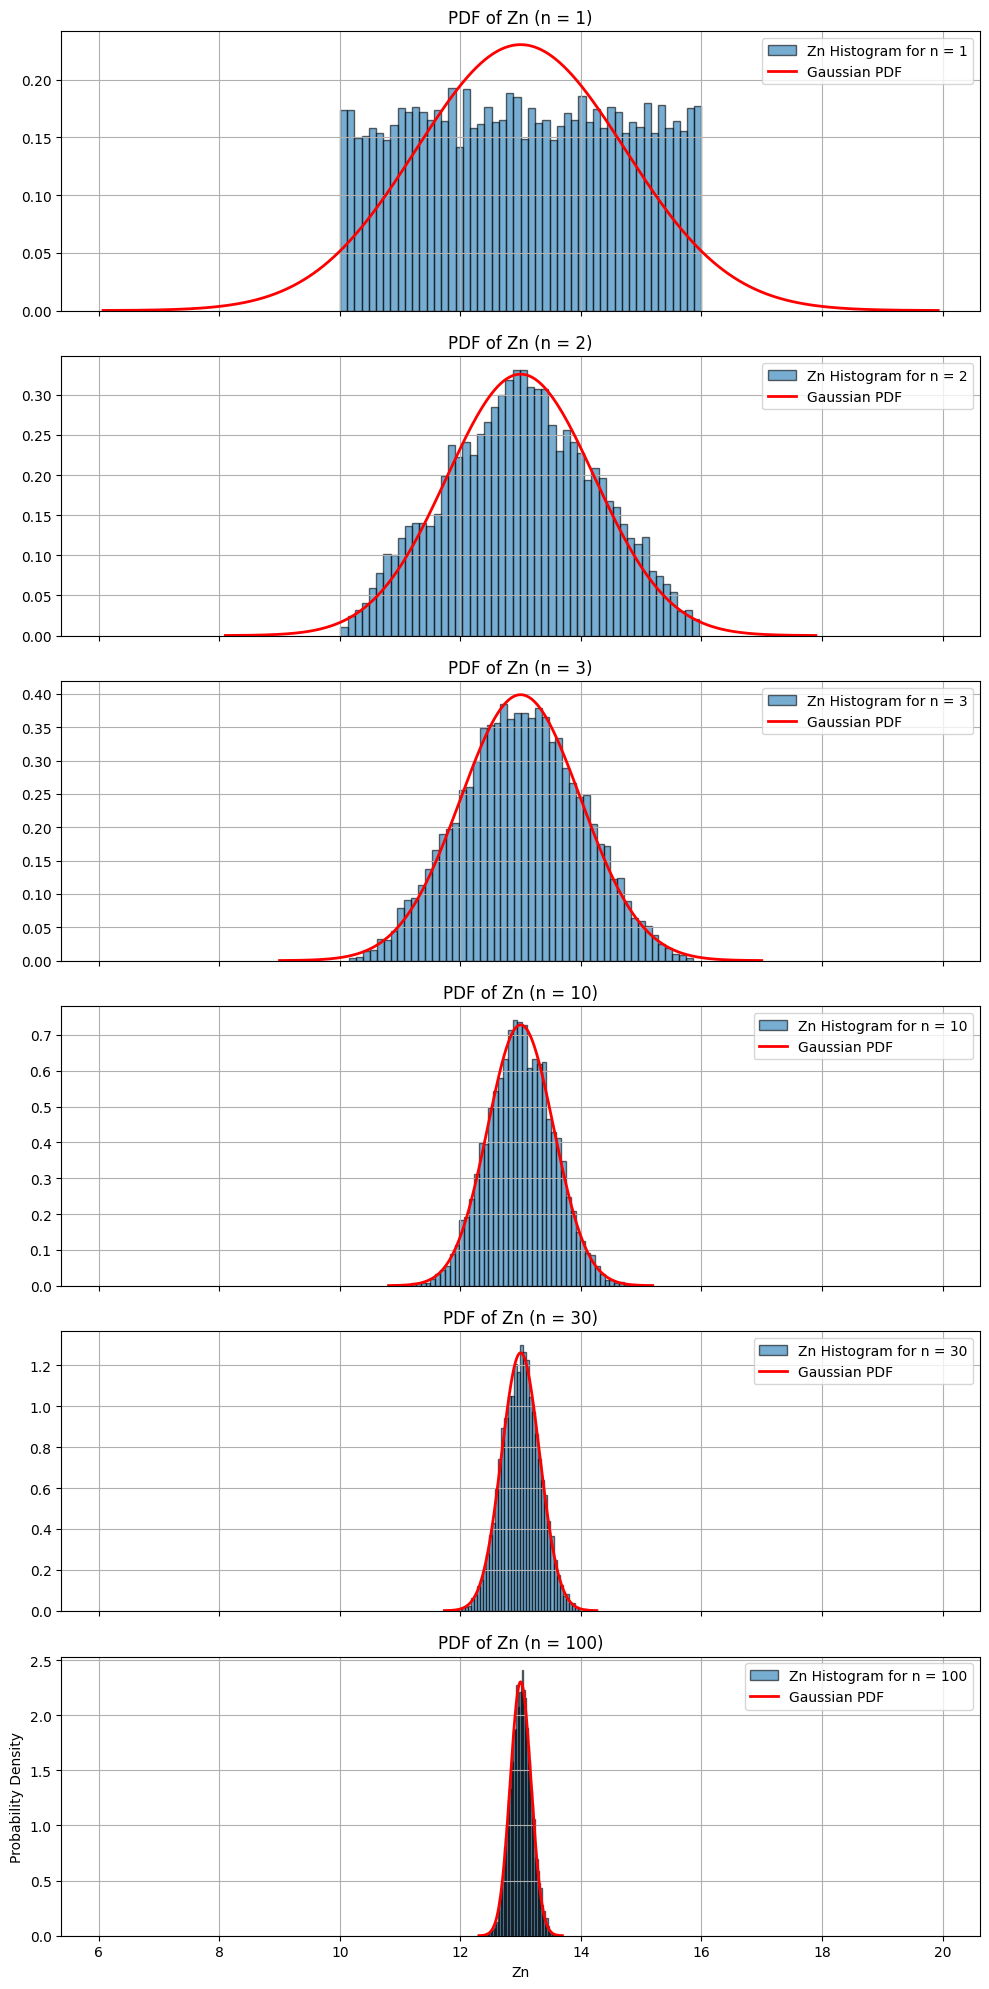

In [11]:
t = 10**4
n_values = [1, 2, 3, 10, 30, 100]

uniform_mean = 13
uniform_variance = 3


fig, axes = plt.subplots(len(n_values), figsize=(10, 20), sharex=True)

for i, n in enumerate(n_values):
    mean_Zn = uniform_mean
    std_dev_Zn = np.sqrt(uniform_variance / n)
    
    Zn_samples = np.mean(np.random.uniform(10, 16, (t, n)), axis=1)
    
    axes[i].hist(Zn_samples, bins=50, density=True, alpha=0.6, label=f'Zn Histogram for n = {n}', edgecolor='black')
    
    x = np.linspace(mean_Zn - 4*std_dev_Zn, mean_Zn + 4*std_dev_Zn, 1000)
    gaussian_pdf = norm.pdf(x, mean_Zn, std_dev_Zn)
    
    axes[i].plot(x, gaussian_pdf, 'r', linewidth=2, label='Gaussian PDF')
    
    axes[i].legend()
    axes[i].set_title(f'PDF of Zn (n = {n})')
    axes[i].grid(True)

# Set common labels
plt.xlabel('Zn')
plt.ylabel('Probability Density')
plt.tight_layout()
plt.show()


<h1> Question 4d </h1>

<h1> Part A for Question 4d </h1>

100


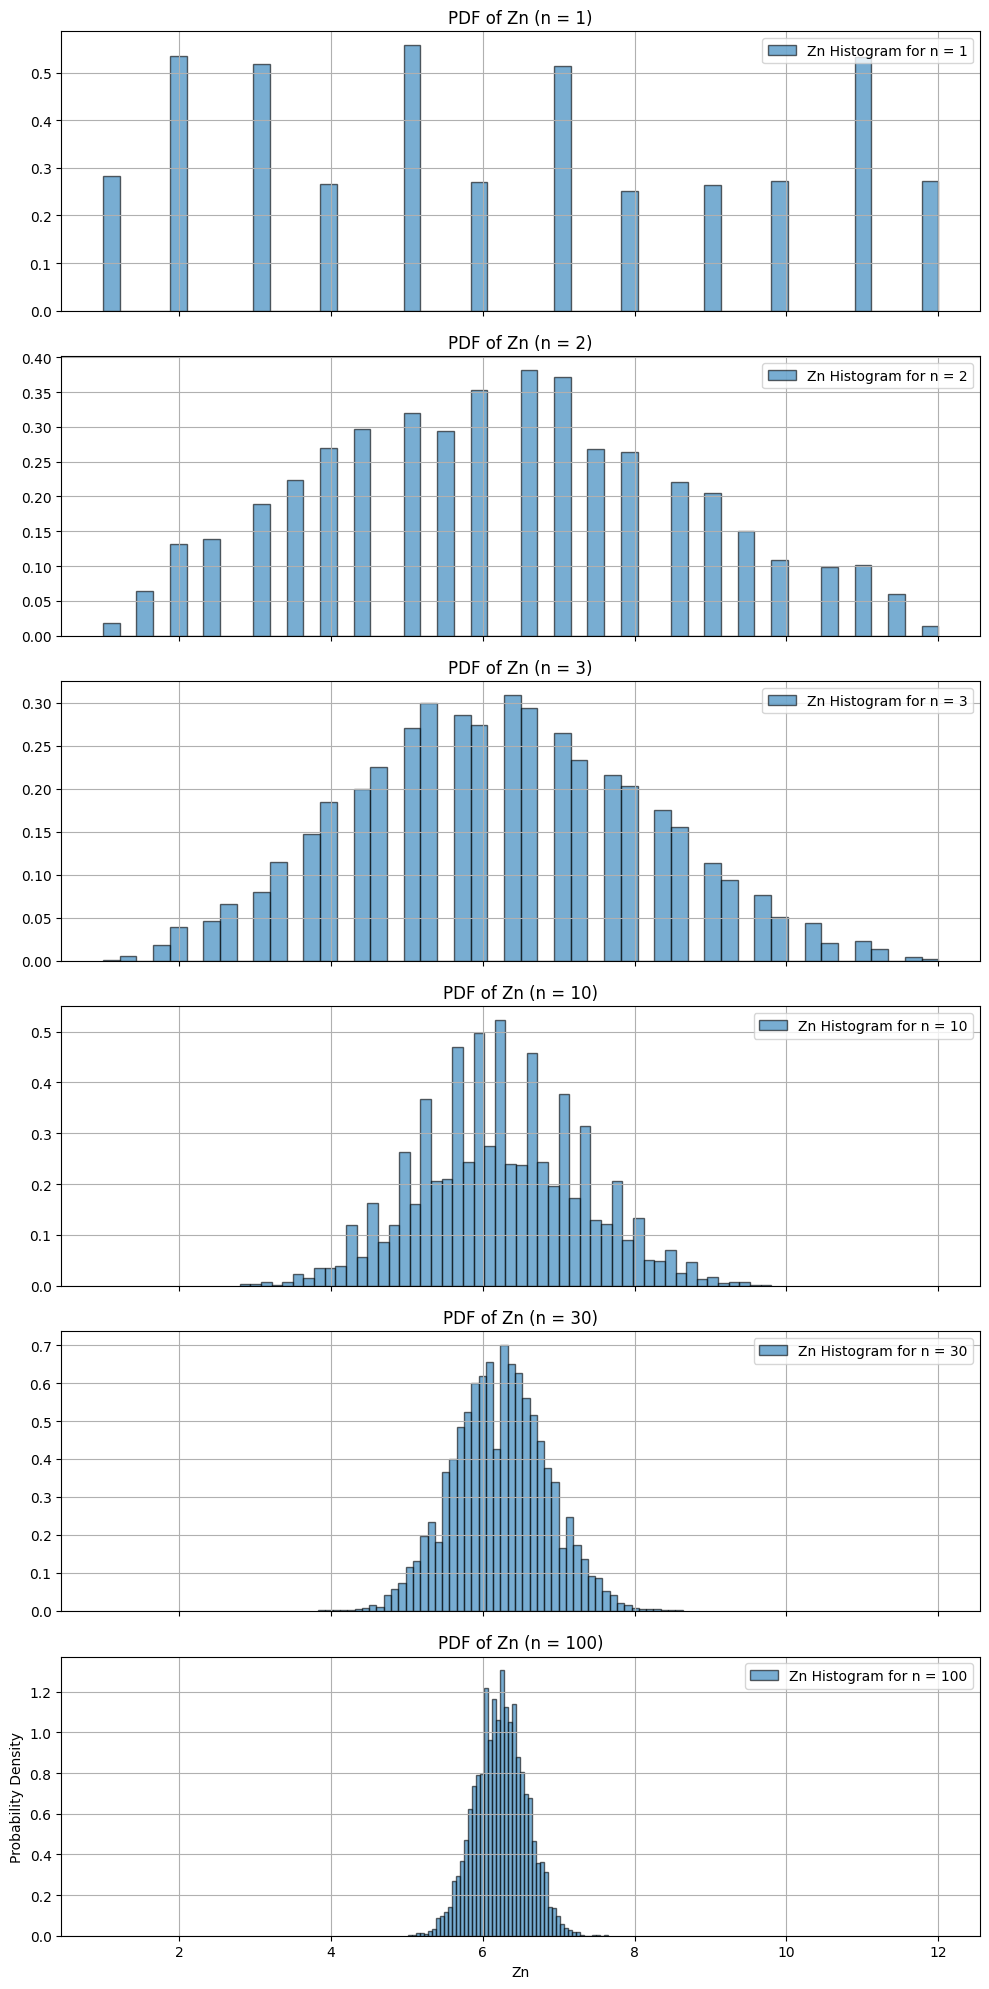

In [12]:
t = 10**4
n_values = [1, 2, 3, 10, 30, 100]
sides = 12

primes = [2, 3, 5, 7, 11]
prime_probability = 2 / (2*len(primes) + (sides - len(primes)))  
non_prime_probability = 1 / (2*len(primes) + (sides - len(primes)))

probabilities = []

for i in range(1, sides + 1):
    if i in primes:
        probabilities.append(prime_probability)
    else:
        probabilities.append(non_prime_probability)

mean_die = 0
for i, prob in enumerate(probabilities, 1):
    mean_die += i * prob

variance_die = 0
for i, prob in enumerate(probabilities, 1):
    variance_die += prob * ((i-mean_die)**2)

print(n)

fig, axes = plt.subplots(len(n_values), figsize=(10, 20), sharex=True)

for i, n in enumerate(n_values):
    Zn_samples = np.random.choice(range(1, sides+1), size=(t, n), p=probabilities).mean(axis=1)
    Standard_Deviation_Zn = np.sqrt(variance_die / n)
    
    axes[i].hist(Zn_samples, bins=50, density=True, alpha=0.6, label=f'Zn Histogram for n = {n}', align='mid', edgecolor='black')
    axes[i].legend()
    axes[i].set_title(f'PDF of Zn (n = {n})')
    axes[i].grid(True)

plt.xlabel('Zn')
plt.ylabel('Probability Density')

plt.tight_layout()
plt.show()


<h1> Part B for Question 4d </h1>

Note Uniform Continuous Random Variable:
<br>
<br>
Mean for Xi = 1/17*1 + 2/17*2 + 2/17*3 + 1/17*4 + 2/17*5 + 1/17*6 + 2/17*7 + 1/17*8 + 1/17*9 + 1/17*10 + 2/17*11 + 1/17*12 = 106/17 = 6.24
<br>
<br>
Variance for Xi = E[X^2] - E[X]^2 = 1/17*1 + 2/17*4 + 2/17*9 + 1/17*16 + 2/17*25 + 1/17*36 + 2/17*49 + 1/17*64 + 1/17*81 + 1/17*100 + 2/17*121 + 1/17*144 - 6.24^2 = 858/17 - 6.24^2 = 11.53
<br>
<br>
Mean of Zn = (E[X1] + E[X2] + ...) / n = 6.24 * n / n = 6.24
<br>
<br>
Variance of Zn = (Var(X1) + Var(X2) + ...) / n^2 = 11.53 * n / n ^ 2 = 11.53 / n
<br>

<h1> Part C for Question 4d </h1>

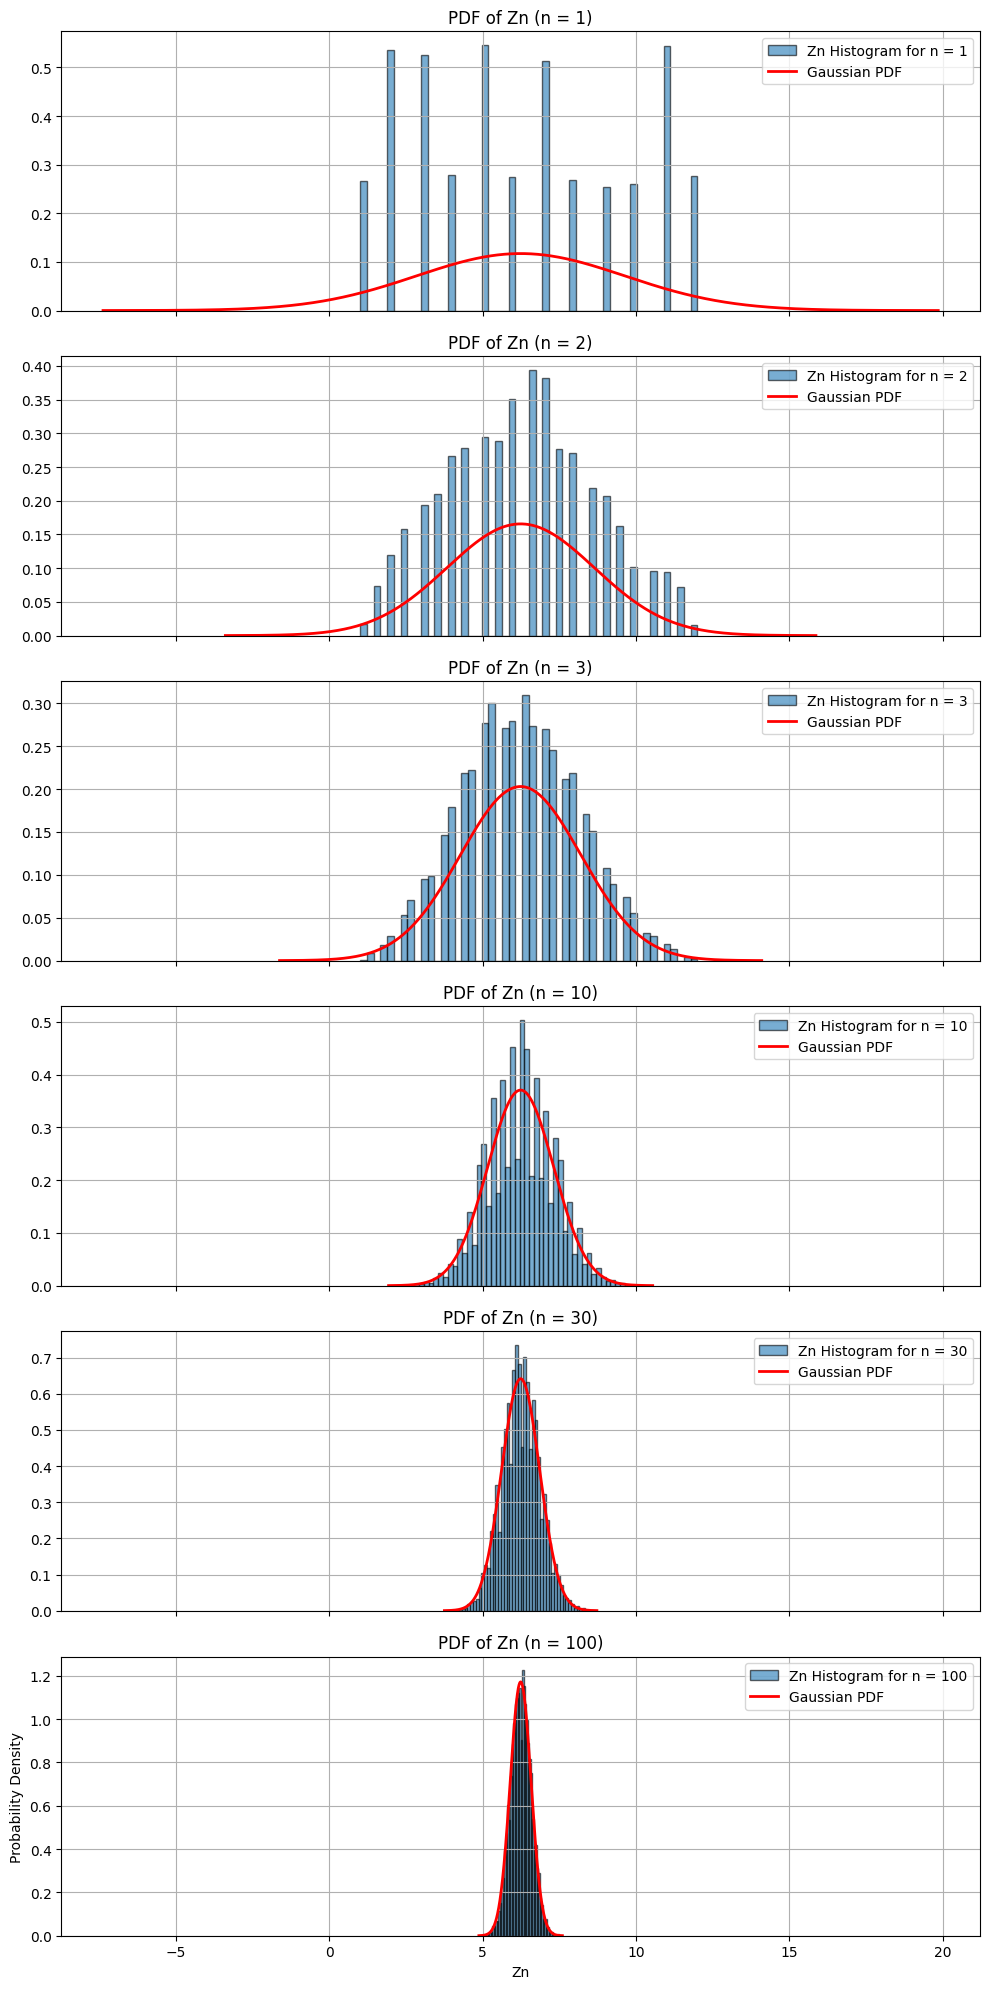

In [53]:
t = 10**4
n_values = [1, 2, 3, 10, 30, 100]

uniform_mean = mean_die
uniform_variance = variance_die

fig, axes = plt.subplots(len(n_values), figsize=(10, 20), sharex=True)

for i, n in enumerate(n_values):
    mean_Zn = uniform_mean
    std_dev_Zn = np.sqrt(uniform_variance / n)
    
    Zn_samples = np.random.choice(range(1, sides+1), size=(t, n), p=probabilities).mean(axis=1)
    
    axes[i].hist(Zn_samples, bins=50, density=True, alpha=0.6, label=f'Zn Histogram for n = {n}', edgecolor='black')
    
    x = np.linspace(mean_Zn - 4*std_dev_Zn, mean_Zn + 4*std_dev_Zn, 1000)
    gaussian_pdf = norm.pdf(x, mean_Zn, std_dev_Zn)
    
    axes[i].plot(x, gaussian_pdf, 'r', linewidth=2, label='Gaussian PDF')
    
    axes[i].legend()
    axes[i].set_title(f'PDF of Zn (n = {n})')
    axes[i].grid(True)

# Set common labels
plt.xlabel('Zn')
plt.ylabel('Probability Density')
plt.tight_layout()
plt.show()


<h1> Question 4e </h1>

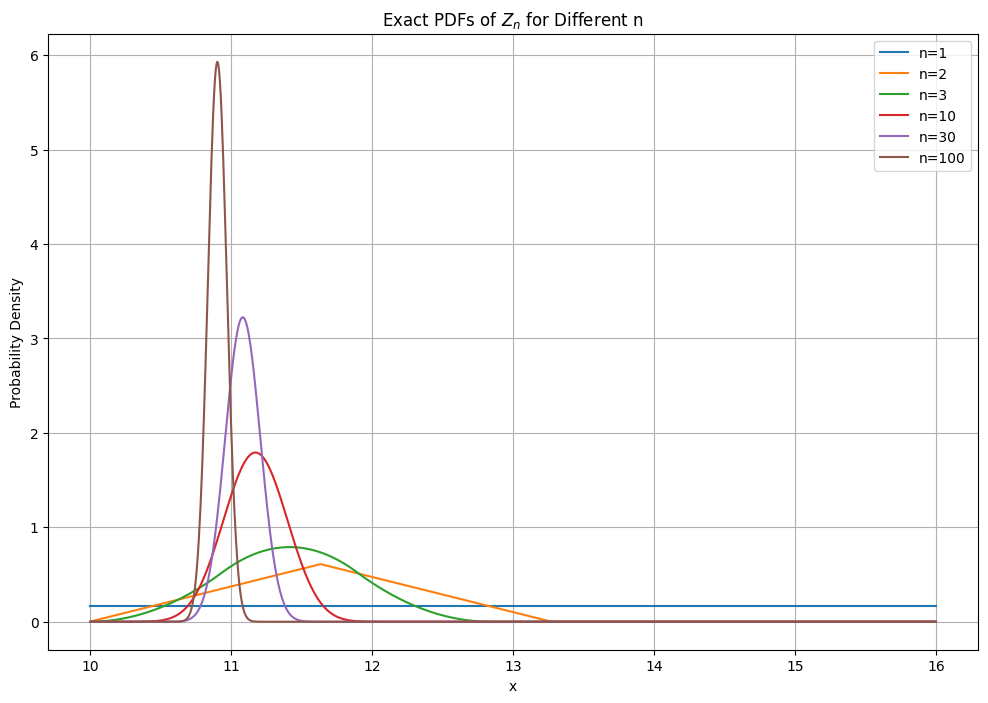

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm

# Parameters for the uniform distribution
a, b = 10, 16
mu = (a + b) / 2
sigma2 = ((b - a) ** 2) / 12

# Function to compute the exact PDF of Zn using convolution
def exact_pdf_Zn(n):
    # Define the range of the distribution after n convolutions
    x = np.linspace(a, b * n, 1000)
    # Initial PDF is just the uniform PDF, we will convolve this with itself (n-1) times
    pdf = uniform.pdf(x, loc=a, scale=b-a)
    for _ in range(1, n):
        pdf = np.convolve(pdf, uniform.pdf(x, loc=a, scale=b-a), mode='full')[:1000] * (x[1] - x[0])
        
    # Adjust for the averaging by changing the scale (not the shape) of the PDF
    x = np.linspace(a, b, 1000)
    pdf = n * pdf[:1000]  # Scaling by n, because the sum's range increases with n
    pdf = pdf / np.trapz(pdf, x)  # Normalize the PDF to ensure the area under it is 1
    return x, pdf

# Compute the exact PDF for different values of n
ns = [1, 2, 3, 10, 30, 100]
exact_pdfs = {}

# Calculate and store the exact PDFs for all the n values
for n in ns:
    exact_pdfs[n] = exact_pdf_Zn(n)

# Now let's plot these PDFs
plt.figure(figsize=(12, 8))
for n in ns:
    x, pdf = exact_pdfs[n]
    plt.plot(x, pdf, label=f'n={n}')

plt.title('Exact PDFs of $Z_n$ for Different n')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()